# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.161797e+01     7.400509e+00
 * time: 0.0038199424743652344
     1     3.085178e+01     5.128045e+00
 * time: 0.01795196533203125
     2     2.123141e+01     5.227403e+00
 * time: 0.035108089447021484
     3     1.800497e+01     4.950592e+00
 * time: 0.05235409736633301
     4     1.224684e+01     2.059732e+00
 * time: 0.12985706329345703
     5     1.003733e+01     1.020926e+00
 * time: 0.14455008506774902
     6     9.483762e+00     1.296893e+00
 * time: 0.15669894218444824
     7     9.037622e+00     8.408465e-01
 * time: 0.16875910758972168
     8     8.691943e+00     6.604577e-01
 * time: 0.18035292625427246
     9     8.467756e+00     5.372216e-01
 * time: 0.1921529769897461
    10     8.321710e+00     5.087327e-01
 * time: 0.2040700912475586
    11     8.207200e+00     6.162456e-01
 * time: 0.2159590721130371
    12     8.103072e+00     4.178735e-01
 * time: 0.22783207893371582
    13     8.002735e+00     3.574949e-01
 * time:

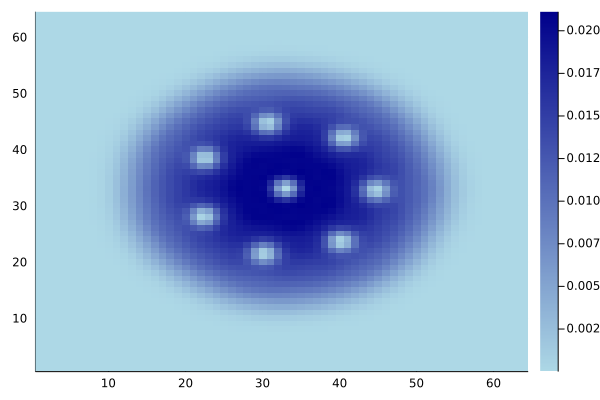

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)